# Project 6 - Optimizing Gym Equipment Utilization
## Team 5- Harsh, Hosang, Simran

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

## Load the Dataset

In [57]:
# Load the data
file_path = '../data/GoodLife/problem1.csv'
data = pd.read_csv(file_path)
data.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


## Data Preprocessing

In [59]:
# Drop the 'date' column as it's not needed
data = data.drop(columns=['date'])

In [60]:
data.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


## Exploratory Data Analysis

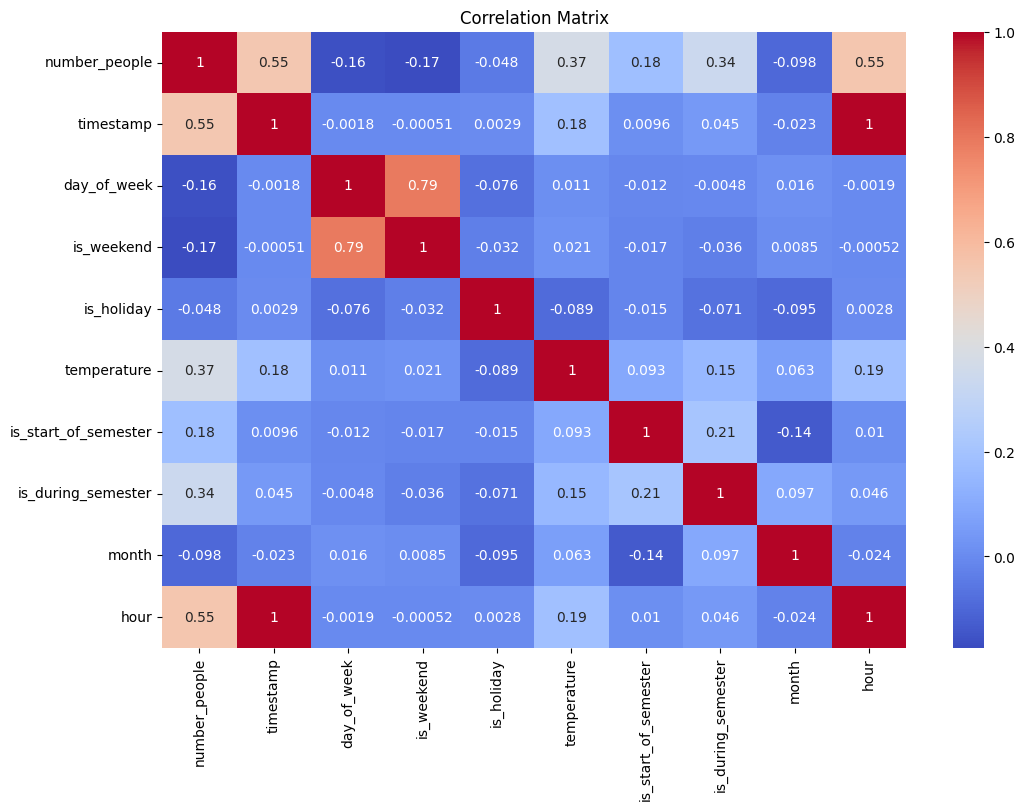

In [61]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

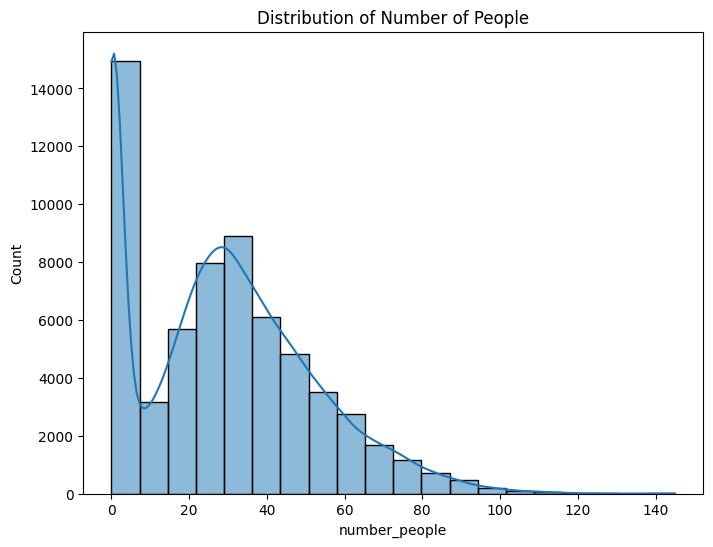

In [62]:
# Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['number_people'], bins=20, kde=True)
plt.title('Distribution of Number of People')
plt.show()

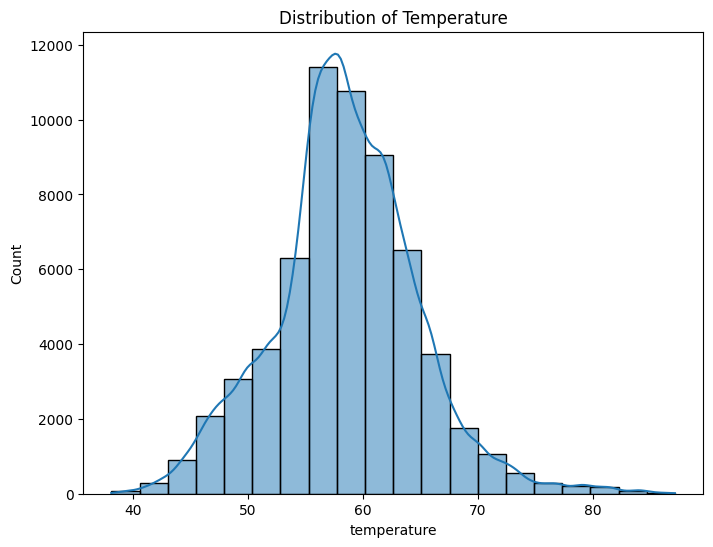

In [63]:
# Plot distribution of 'temperature'
plt.figure(figsize=(8, 6))
sns.histplot(data['temperature'], bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.show()

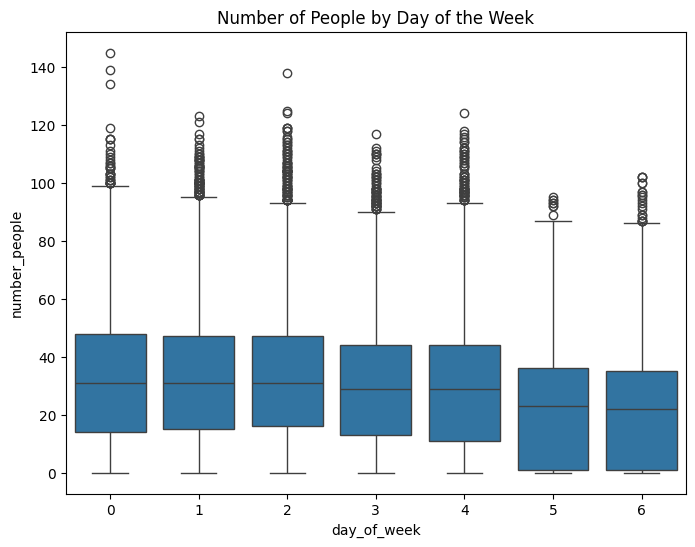

In [64]:
# Plot number of people by day of the week
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_week', y='number_people', data=data)
plt.title('Number of People by Day of the Week')
plt.show()

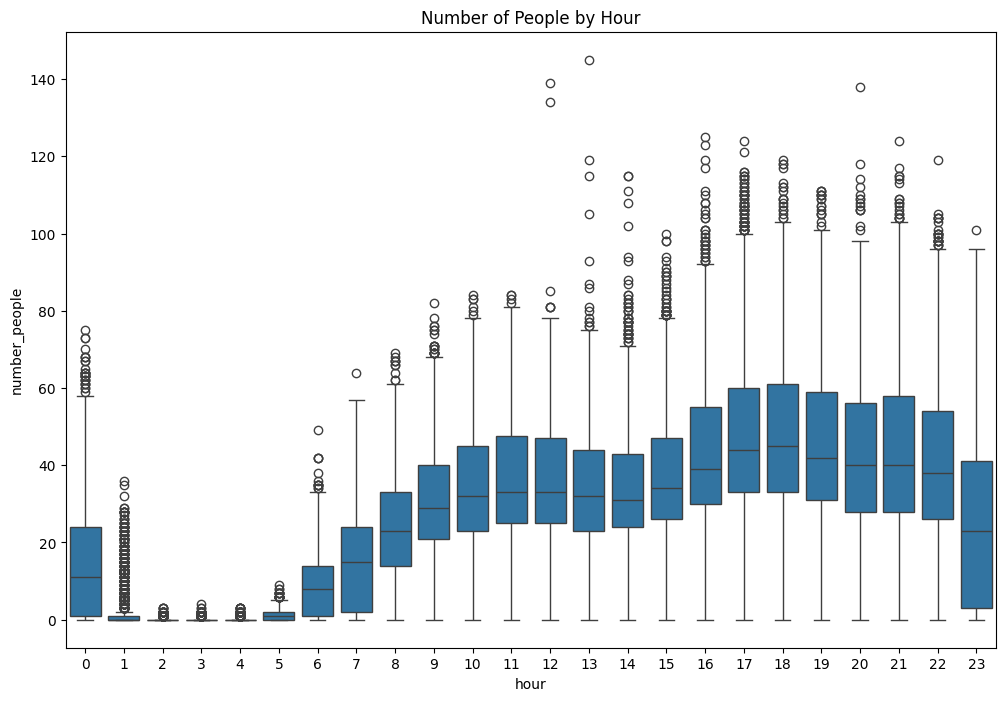

In [65]:
# Plot number of people by hour
plt.figure(figsize=(12, 8))
sns.boxplot(x='hour', y='number_people', data=data)
plt.title('Number of People by Hour')
plt.show()

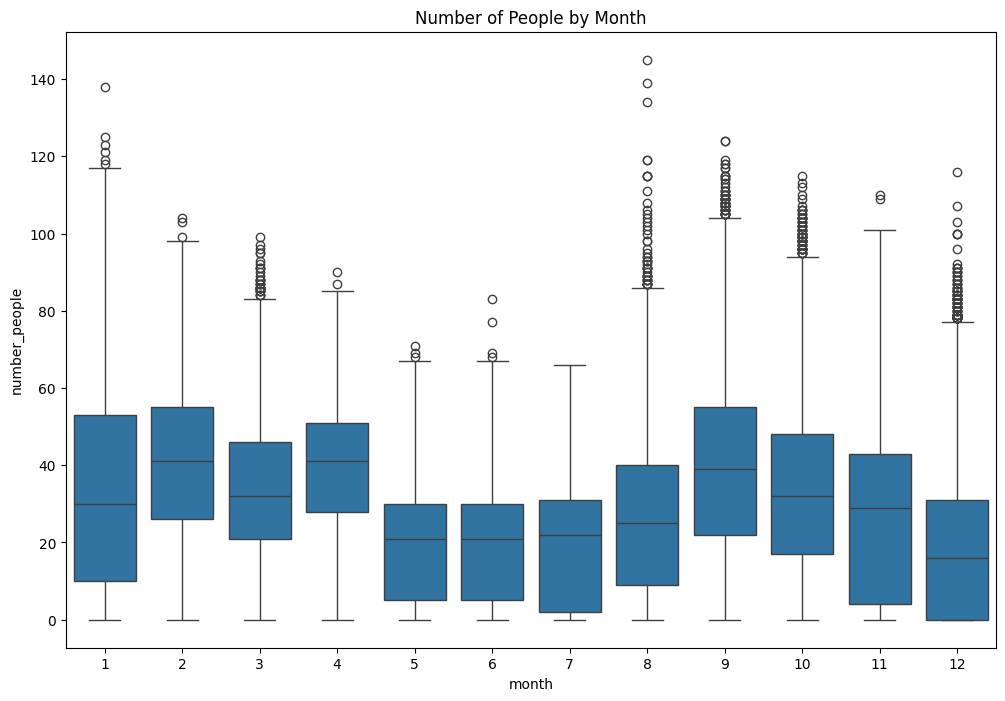

In [66]:
# Plot number of people by month
plt.figure(figsize=(12, 8))
sns.boxplot(x='month', y='number_people', data=data)
plt.title('Number of People by Month')
plt.show()

## Training & Evaluation

In [67]:
# Drop the 'timestamp', and 'is_weekend' columns
data = data.drop(columns=['timestamp', 'is_weekend'])

In [68]:
# Define features and target variable
y = data['number_people']
X = data.drop(columns=['number_people'])

In [69]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (49747, 7)
X_test shape: (12437, 7)
y_train shape: (49747,)
y_test shape: (12437,)


In [70]:
# Train and evaluate Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)

print("Linear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linreg))
print("R^2 Score:", r2_score(y_test, y_pred_linreg))

Linear Regression Results:
Mean Squared Error: 252.48585845331786
R^2 Score: 0.5114888608145887


In [71]:
# Train and evaluate Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Results:
Mean Squared Error: 38.92469784432324
R^2 Score: 0.9246882633234923


In [72]:
# Train and evaluate XGBoost model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))
print("R^2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost Results:
Mean Squared Error: 82.71227698752902
R^2 Score: 0.8399677950150712


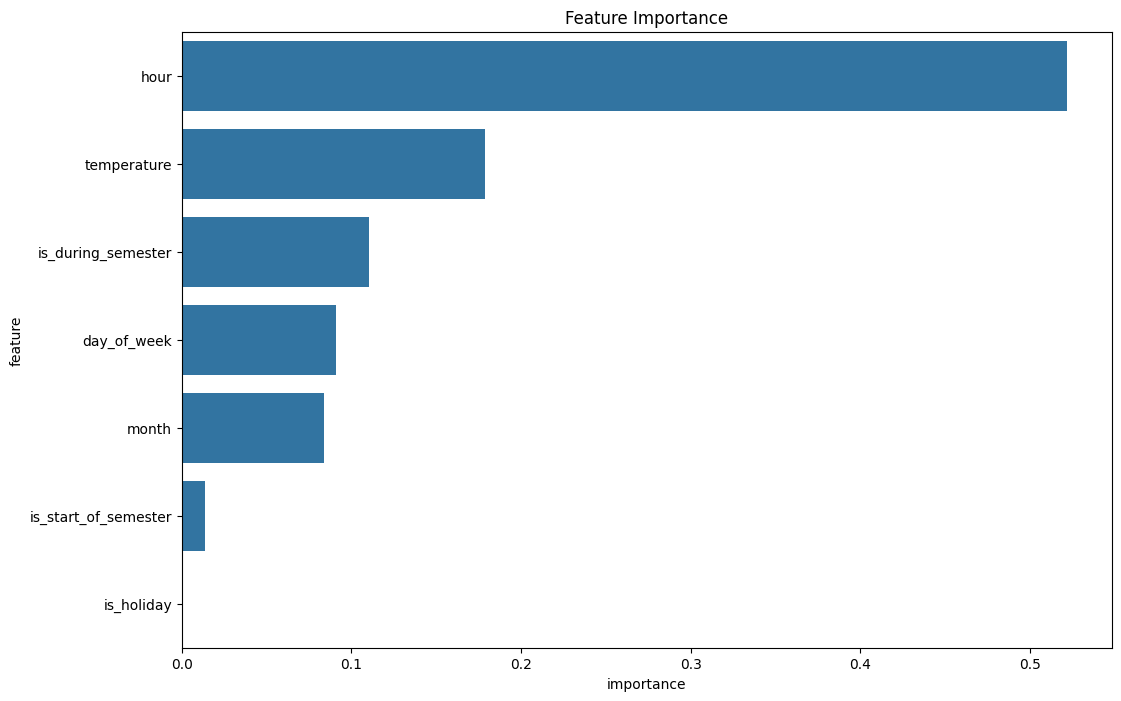

In [73]:
# Feature importance using Random Forest
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()